In [8]:
import os 
import flopy
import matplotlib.pyplot as plt
from flopy.plot import PlotMapView, PlotCrossSection
from flopy.utils.binaryfile import HeadFile

In [9]:
exe_name = "../bin/mf6"
modelname = "simple"
ws = "../problems/simple_00"

In [10]:
nlay = 1
top = 10
botm = [0]
nrow = 50
ncol = 30
delr = 5
delc = 5

In [50]:
sim = flopy.mf6.MFSimulation(exe_name=exe_name, sim_ws=ws)
gwf = flopy.mf6.ModflowGwf(sim, modelname=modelname)
ims = flopy.mf6.ModflowIms(sim, complexity="SIMPLE", outer_dvclose=0.0001, 
                           inner_dvclose=0.00001, linear_acceleration="BICGSTAB")
tdis = flopy.mf6.ModflowTdis(sim, time_units="days")

In [51]:
dis = flopy.mf6.ModflowGwfdis(gwf, length_units="METERS", nrow=nrow, ncol=ncol, nlay=nlay, delc=delc,
                              delr=delr, top=top, botm=botm)

In [52]:
k = ([4] * 30) * 25 + ([1] * 30) * 25
npf = flopy.mf6.ModflowGwfnpf(gwf, k=k)

In [53]:
rch = flopy.mf6.ModflowGwfrcha(gwf, recharge=0.0007)
ic = flopy.mf6.ModflowGwfic(gwf, strt=top)

In [54]:
std_chd = [[(0, i, 0), top] for i in range(nrow)]
chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=std_chd)

In [55]:
std_riv = [[(0, i, 29), top - 5, 0.01, top - 6] for i in range(nrow)]
riv = flopy.mf6.ModflowGwfriv(gwf, stress_period_data=std_riv)

In [56]:
oc = flopy.mf6.ModflowGwfoc(gwf, 
                            budget_filerecord=f"{modelname}.cbb",
                            head_filerecord=f"{modelname}.hds",
                            headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
                            printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
                            saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")]
                           )

In [57]:
sim.write_simulation()
success, buff = sim.run_simulation()
if success:
    for line in buff:
        print(line)
else:
    raise ValueError("Неудачно")


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model simple...
    writing model name file...
    writing package dis...
    writing package npf...
    writing package rcha_0...
    writing package ic...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 50 based on size of stress_period_data
    writing package riv_0...
INFORMATION: maxbound in ('gwf6', 'riv', 'dimensions') changed to 50 based on size of stress_period_data
    writing package oc...
FloPy is using the following executable to run the model: ../../bin/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                   VERSION 6.3.0 release candidate 03/08/2022
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Mar 08 2022 20:13:10 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications r

In [58]:
hds_data = HeadFile(os.path.join(ws, f"{modelname}.hds"))
heads = hds_data.get_data()

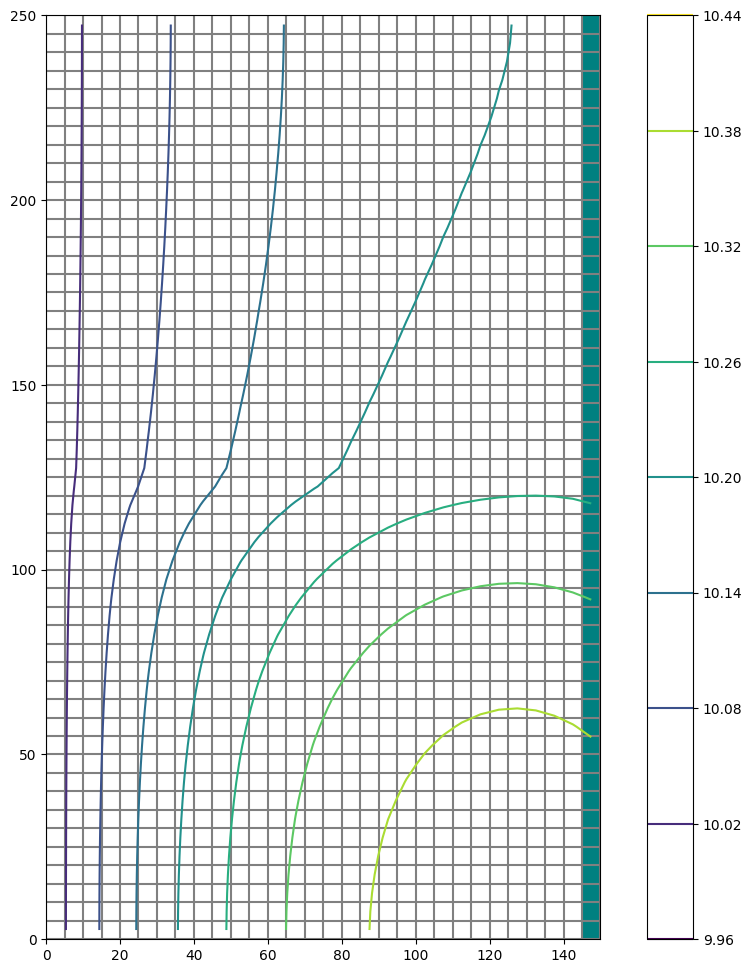

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
pmv = PlotMapView(modelgrid=gwf.modelgrid)
pmv.plot_grid()
pmv.plot_bc(package=riv)
cnt = pmv.contour_array(heads[0])
fig.colorbar(cnt)

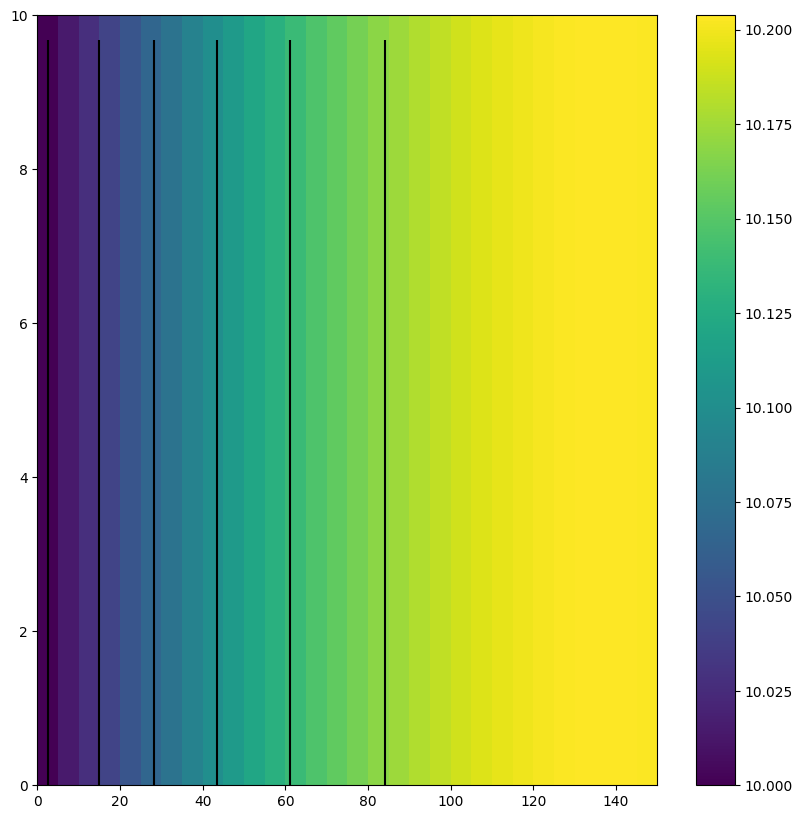

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
xsect = PlotCrossSection(modelgrid=gwf.modelgrid, line={"Row": 5})
xsect.plot_grid()
fl = xsect.plot_array(heads[0], head=heads[0])
cnt = xsect.contour_array(heads[0], head=heads[0], colors='k')
cl = plt.clabel(cnt, fmt="%.2f", colors="k", fontsize=10)
for l in cl:
    l.set_va("bottom")
fig.colorbar(fl)

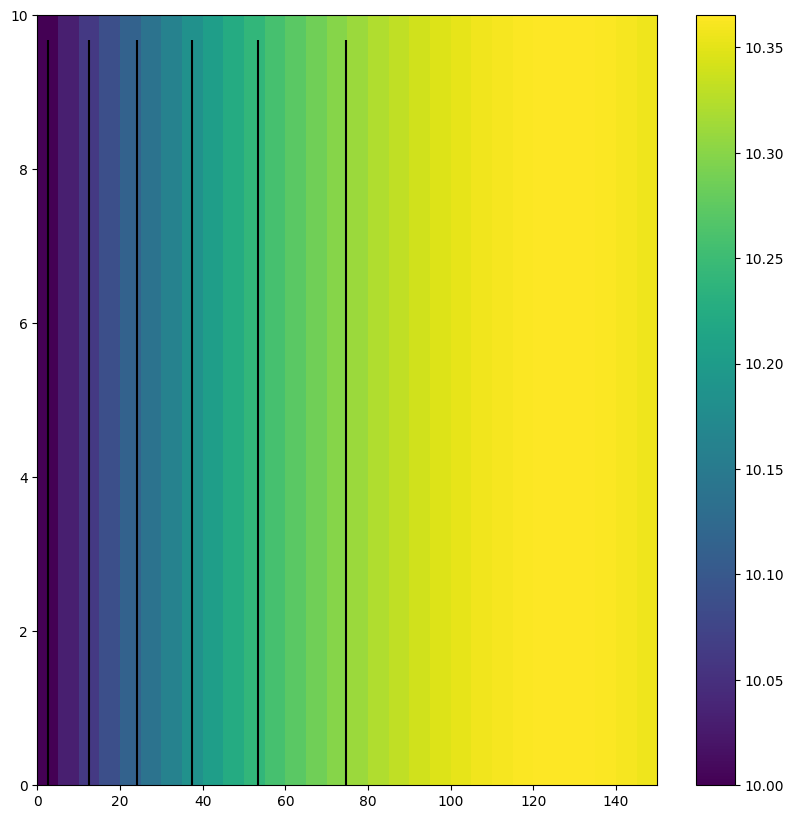

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
xsect = PlotCrossSection(modelgrid=gwf.modelgrid, line={"Row": 35})
xsect.plot_grid()
fl = xsect.plot_array(heads[0], head=heads[0])
cnt = xsect.contour_array(heads[0], head=heads[0], colors='k')
cl = plt.clabel(cnt, fmt="%.2f", colors="k", fontsize=10)
for l in cl:
    l.set_va("bottom")
fig.colorbar(fl)

#### 